In [1]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline 

#для четкой прорисовки графиков
#%config InlineBackend.figure_format = 'svg'

def read_energy(file: str) -> tuple[np.ndarray, np.ndarray]:
    x_vals = []
    y_vals = []
    with open(file) as f:
        for s in f.readlines():
            time, energy = map(float, s.split())
            x_vals.append(time)
            y_vals.append(energy)
    return np.array(x_vals), np.array(y_vals)

def sliding_average(arr: np.ndarray, window):
    return np.convolve(arr, [1] * window, 'same') / window

a = np.array([3, 0, 3])
sliding_average(a, 3)

array([1., 2., 1.])

# Stress vs strain

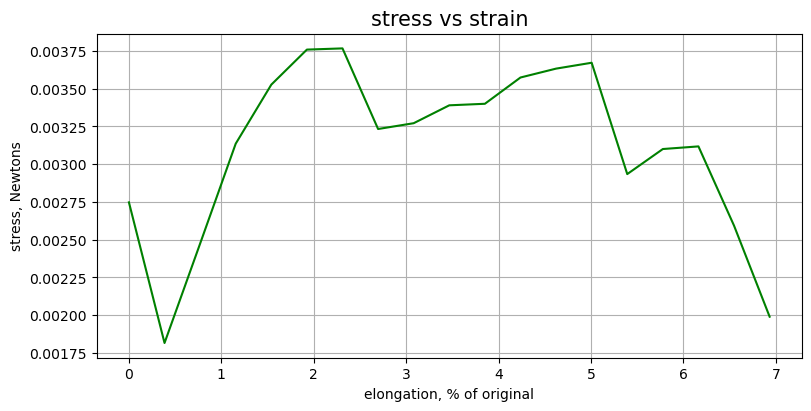

In [9]:
base_path = "../buildDir/milestones/09/"
x, stress = read_energy(base_path + "stress-1.txt")

s = 144.25 # 287.7
d = 10.0
x = np.linspace(s, s + d, len(stress))
x = (x - s) / s * 100

fig, axs = plt.subplots(1, 1, layout='constrained', figsize=(8,4))

axs.set_title('stress vs strain',fontsize=15)
axs.plot(x, stress, linestyle='-', color='g', label='total')
axs.grid(True)
axs.set_xlabel('elongation, % of original',  fontsize=10)
axs.set_ylabel('stress, Newtons',  fontsize=10)
#axs[0].legend(fontsize=10)

fig.savefig("fig.pdf")